In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
Data=pd.read_excel('/content/drive/MyDrive/Labelled Reddit Data.xlsx')

In [3]:
Data.head()

,Unnamed: 0,Lemma,clusters,Manual Label,MANUAL,Match,Word_Count,Unnamed: 7,Unnamed: 8
0,0,Megathread Joe Biden Projected Defeat Presid...,0,1,True,NaN,12,NaN,NaN
1,1,Mitch McConnell Lose Control Senate Democrat...,1,1,True,NaN,9,"Note: 0=FALSE , 1=TRUE",NaN
2,2,Megathread House Votes Impeach President Don...,0,1,True,NaN,8,NaN,NaN
3,3,Trump Threatens Leave Country Loses Biden,0,1,True,NaN,6,NaN,NaN
4,9,Virginia governor make Election Day holiday ...,1,1,True,NaN,9,NaN,NaN


In [4]:
X_true=Data['Manual Label']
X_pred=Data['clusters']

In [5]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [58]:
accuracy = accuracy_score(X_true, X_pred)
precision = precision_score(X_true, X_pred)
f1 = f1_score(X_true, X_pred)
Spec = metrics.recall_score(X_true, X_pred, pos_label=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"Specificity: {Spec}")

Accuracy: 0.7634349030470914
Precision: 0.9239971850809289
F1 Score: 0.8601375696036685
Specificity: 0.37572254335260113


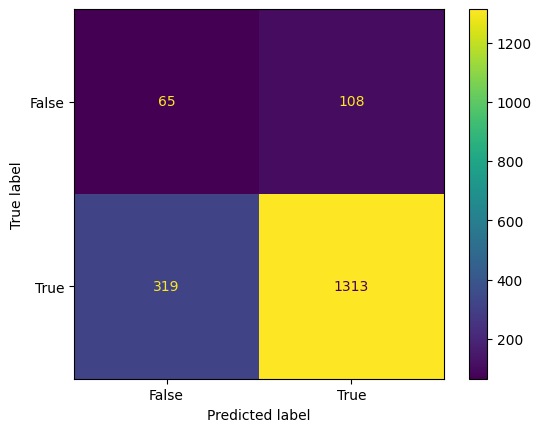

In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(X_true, X_pred)

cf = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cf.plot()
plt.show()

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.model_selection import train_test_split

In [ ]:
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(Data['Lemma'])

In [ ]:
#X_train=X
#Y_train=Data['Manual Label']

In [ ]:
#from tensorflow import keras
#from keras.layers import Dense
#from keras.models import Sequential, load_model

In [ ]:
#from tensorflow.keras.preprocessing.text import one_hot
#text = Data['Lemma']
#vocabulary_size = 50
#encoded_text = [one_hot(words, vocabulary_size) for words in text]
#print(encoded_text)


In [ ]:
#from keras.models import Sequential
#from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
#input_shape = (20, 4686)

In [ ]:
#import numpy as np
#classes = np.unique(Y_train)
#num_classes = len(classes)
#print(num_classes)

In [ ]:
#X_train.shape

In [ ]:
#X_train

In [ ]:
#Y_train

In [ ]:
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
#print(type(Y_train))

In [ ]:
#X_train=np.matrix(X_train)

In [ ]:
#X_train=X_train.toarray().astype(int)


In [ ]:
#Y_train=Y_train.toarray().astype(int)

In [ ]:
#model = Sequential()
#model.add(Conv1D(32, 3, activation='relu', input_shape=X_train.shape))
#model.add(MaxPooling1D(2))
#model.add(Conv1D(64, 3, activation='relu'))
#model.add(MaxPooling1D(2))
#model.add(Flatten())
#model.add(Dense(64, activation='relu'))
#model.add(Dense(2, activation='softmax'))

In [ ]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(X_train, Y_train)

In [98]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Conv1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [99]:
train_data, test_data = train_test_split(Data, test_size=0.4, random_state=42)


In [100]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(train_data['Lemma'])
X_train = tokenizer.texts_to_sequences(train_data['Lemma'])
X_test = tokenizer.texts_to_sequences(test_data['Lemma'])

In [101]:
train_data['Lemma']

1480      Amber Guyger find guilty murder fatal shooti...
906       Arrest warrant issue Tampa megachurch pastor...
1175      EA day reckoning Star Wars game uproar billi...
447       Jan Capitol riot committee subpoena former P...
1226            Pentagon require COVID vaccine troop Sept
                              ...                        
1130                US Supreme Court reject Texas lawsuit
1294          Sen Mitch McConnell home Kentucky vandalize
860       Woman Fired Calling Police Black Man Central...
1459      Armed subject try breach FBI HQ Cincinnati a...
1126                            AP Calls Nevada Joe Biden
Name: Lemma, Length: 1083, dtype: object

In [102]:
max_len = 99
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [103]:
y_train = pd.get_dummies(train_data['Manual Label']).values
y_test = pd.get_dummies(test_data['Manual Label']).values

In [12]:
y_train.shape

(1083, 2)

In [13]:
y_test.shape

(722, 2)

In [104]:
model = Sequential()
model.add(Embedding(20000, 150, input_length=max_len))
model.add(Conv1D(64, 5, activation='sigmoid'))
model.add(Conv1D(32, 5, activation='relu'))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(2, activation='sigmoid'))

In [105]:
model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

In [ ]:
#y_train=[first[1:] for first in y_train]

In [ ]:
#y_train=[X for first in y_train for X in first]


In [ ]:
#y_train=np.array(y_train)

In [ ]:
y_train

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [106]:
#model.fit(X_train, y_train,epochs=50)
from keras.callbacks import EarlyStopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=5, monitor='val_accuracy', mode='max')])

Epoch 1/50
34/34 [==============================] - 3s 63ms/step - loss: 1.2532 - accuracy: 0.9040 - val_loss: 1.2078 - val_accuracy: 0.8975
Epoch 2/50
34/34 [==============================] - 2s 54ms/step - loss: 1.1590 - accuracy: 0.9086 - val_loss: 1.1082 - val_accuracy: 0.8975
Epoch 3/50
34/34 [==============================] - 2s 54ms/step - loss: 1.0646 - accuracy: 0.9086 - val_loss: 1.0222 - val_accuracy: 0.8975
Epoch 4/50
34/34 [==============================] - 2s 54ms/step - loss: 0.9901 - accuracy: 0.9086 - val_loss: 0.9740 - val_accuracy: 0.8975
Epoch 5/50
34/34 [==============================] - 3s 94ms/step - loss: 0.9577 - accuracy: 0.9086 - val_loss: 0.9562 - val_accuracy: 0.8975
Epoch 6/50
34/34 [==============================] - 3s 84ms/step - loss: 0.9480 - accuracy: 0.9086 - val_loss: 0.9502 - val_accuracy: 0.8975


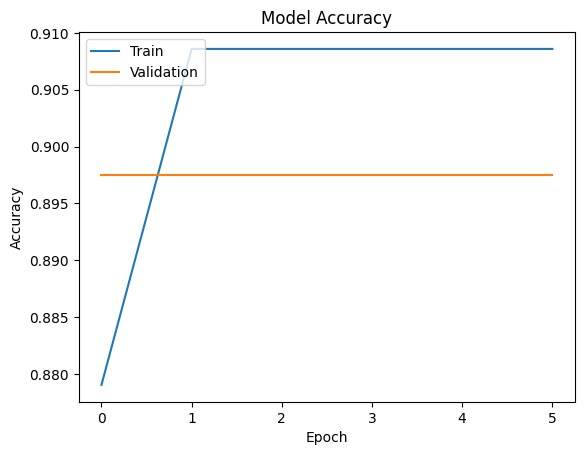

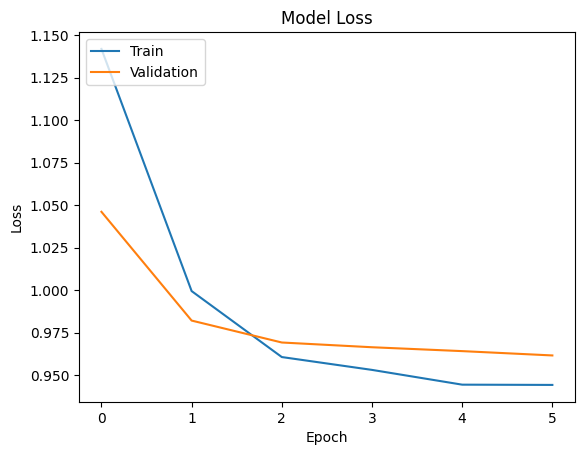

In [22]:
# Plotting the training and validation accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
X_train

array([[   0,    0,    0, ...,  168, 1533, 1534],
       [   0,    0,    0, ..., 1537,   96,   45],
       [   0,    0,    0, ...,   89,  511,  667],
       ...,
       [   0,    0,    0, ...,   15,  695,  874],
       [   0,    0,    0, ..., 3561, 1453,   35],
       [   0,    0,    0, ...,  946,   42,    3]], dtype=int32)

In [ ]:
#y_train

In [24]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [25]:
Data2=pd.read_excel('/content/drive/MyDrive/FYP VIVA Presentation/unlabelled data2.xlsx')

In [26]:
new_sequences = tokenizer.texts_to_sequences(Data2['Lemma'])
new_sequences = pad_sequences(new_sequences, maxlen=max_len)
pred = model.predict(new_sequences)

208/208 [==============================] - 3s 14ms/step


In [27]:
predicted_labels = np.argmax(pred, axis=1)

In [28]:
unique_labels = np.unique(predicted_labels)
print(f"Unique Predicted Labels: {unique_labels}")

Unique Predicted Labels: [1]


In [29]:
for i in range(len(predicted_labels)):
    print(f"Sample {i}: Predicted Label = {predicted_labels[i]}")

Streaming output truncated to the last 5000 lines.
Sample 1645: Predicted Label = 1
Sample 1646: Predicted Label = 1
Sample 1647: Predicted Label = 1
Sample 1648: Predicted Label = 1
Sample 1649: Predicted Label = 1
Sample 1650: Predicted Label = 1
Sample 1651: Predicted Label = 1
Sample 1652: Predicted Label = 1
Sample 1653: Predicted Label = 1
Sample 1654: Predicted Label = 1
Sample 1655: Predicted Label = 1
Sample 1656: Predicted Label = 1
Sample 1657: Predicted Label = 1
Sample 1658: Predicted Label = 1
Sample 1659: Predicted Label = 1
Sample 1660: Predicted Label = 1
Sample 1661: Predicted Label = 1
Sample 1662: Predicted Label = 1
Sample 1663: Predicted Label = 1
Sample 1664: Predicted Label = 1
Sample 1665: Predicted Label = 1
Sample 1666: Predicted Label = 1
Sample 1667: Predicted Label = 1
Sample 1668: Predicted Label = 1
Sample 1669: Predicted Label = 1
Sample 1670: Predicted Label = 1
Sample 1671: Predicted Label = 1
Sample 1672: Predicted Label = 1
Sample 1673: Predicted La

In [30]:
Data.head()

,Unnamed: 0,Lemma,clusters,Manual Label,MANUAL,Match,Word_Count,Unnamed: 7,Unnamed: 8
0,0,Megathread Joe Biden Projected Defeat Presid...,0,1,True,NaN,12,NaN,NaN
1,1,Mitch McConnell Lose Control Senate Democrat...,1,1,True,NaN,9,"Note: 0=FALSE , 1=TRUE",NaN
2,2,Megathread House Votes Impeach President Don...,0,1,True,NaN,8,NaN,NaN
3,3,Trump Threatens Leave Country Loses Biden,0,1,True,NaN,6,NaN,NaN
4,9,Virginia governor make Election Day holiday ...,1,1,True,NaN,9,NaN,NaN


In [ ]:
#true_labels = Data['Manual Label'].values

# Check if the predicted label is correct or not
#correct_predictions = 0
#for i in range(len(predicted_labels)):
#    if predicted_labels[i] == true_labels[i]:
#        correct_predictions += 1
#        print(f"Sample {i}: Predicted Label = {predicted_labels[i]} (Correct)")
#    else:
#        print(f"Sample {i}: Predicted Label = {predicted_labels[i]} (Incorrect)")

# Calculate the accuracy of the model
#accuracy = correct_predictions / len(predicted_labels)
#print(f"\nAccuracy: {accuracy}")

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline


train_data, test_data = train_test_split(Data, test_size=0.3, random_state=42)


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])


pipeline.fit(train_data['Lemma'], train_data['Manual Label'])


accuracy = pipeline.score(test_data['Lemma'], test_data['Manual Label'])
print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.8874538745387454


In [32]:
new_data_transformed = pipeline.named_steps['tfidf'].transform(Data2['Lemma'])
pred_labels = pipeline.named_steps['clf'].predict(new_data_transformed)
unique_labels2 = np.unique(pred_labels)
unique_labels2 

array([0, 1])

In [33]:
for i in range(len(pred_labels)):
    print(f"Sample {i}: Predicted Label = {pred_labels[i]}")

Streaming output truncated to the last 5000 lines.
Sample 1645: Predicted Label = 1
Sample 1646: Predicted Label = 1
Sample 1647: Predicted Label = 1
Sample 1648: Predicted Label = 1
Sample 1649: Predicted Label = 1
Sample 1650: Predicted Label = 1
Sample 1651: Predicted Label = 1
Sample 1652: Predicted Label = 1
Sample 1653: Predicted Label = 1
Sample 1654: Predicted Label = 1
Sample 1655: Predicted Label = 1
Sample 1656: Predicted Label = 1
Sample 1657: Predicted Label = 1
Sample 1658: Predicted Label = 1
Sample 1659: Predicted Label = 1
Sample 1660: Predicted Label = 1
Sample 1661: Predicted Label = 1
Sample 1662: Predicted Label = 1
Sample 1663: Predicted Label = 1
Sample 1664: Predicted Label = 1
Sample 1665: Predicted Label = 1
Sample 1666: Predicted Label = 1
Sample 1667: Predicted Label = 1
Sample 1668: Predicted Label = 1
Sample 1669: Predicted Label = 1
Sample 1670: Predicted Label = 1
Sample 1671: Predicted Label = 1
Sample 1672: Predicted Label = 1
Sample 1673: Predicted La

In [34]:
Data2['predictedlabel']=pred_labels
Data2.head()

,Unnamed: 0,Lemma,clusters,MANUAL,Match,Word_Count,Unnamed: 6,predictedlabel
0,4,Demands Kushner Resign Staggering Level Depr...,1,-,NaN,28,NaN,1
1,5,million people sign petition call KKK declar...,1,-,NaN,9,Note: For match the green means it matches wit...,1
2,6,Report Biden Admin Discovers Trump Zero Plan...,0,-,NaN,10,NaN,1
3,7,Biden Pennsylvania lead big enough avoid aut...,1,-,NaN,8,NaN,1
4,8,Donald Trump Left White House Time Good,0,-,NaN,7,NaN,1


In [35]:
Data3=Data2[Data2['predictedlabel']==0]
Data3

,Unnamed: 0,Lemma,clusters,MANUAL,Match,Word_Count,Unnamed: 6,predictedlabel
181,389,Anarchist Daughter GOP Gerrymandering Master...,1,-,NaN,10,NaN,0
182,393,Constitutional Right Eat Dinner Claims Justi...,1,-,NaN,17,NaN,0
183,396,President Admitted Court Ran Crooked Charity...,1,-,NaN,9,NaN,0
188,477,Biden Calls Socialist Republicans Begging Mo...,1,-,NaN,8,NaN,0
198,657,Unconscionable House Committee Adds Billion ...,1,-,NaN,25,NaN,0
199,667,sheriff fire lesbian run office demolish,1,-,NaN,6,NaN,0
200,668,Susan Collins help cripple USPS Maine farmer...,1,-,NaN,12,NaN,0
201,670,Sen Duckworth Republicans Trusting Reddit Co...,1,-,NaN,8,NaN,0
203,683,Trump furiously watch Fauci give interview r...,0,-,NaN,11,NaN,0
295,71,Peoples Russia wan na war,1,NaN,NaN,5,NaN,0
